In [8]:
#shows evolution of some scalar hyperbolic eqs; since no special treatement of centered rarefaction, they are not captured well
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def FlxFn(u):
    flx_fn = FlxAdvection
    return flx_fn(u)

def FlxAdvection(u):
    return u #signal speed = 1

def CharcAdvection(u):
    return 1

def FlxBurgers(u):
    return 0.5*u*u

def CharcBurgers(u):
    return u

def FlxTraffic(u):
    return u*(1-u)

def CharcTraffic(u):
    return 1 - 2*u

def Flux(uL, uR):
    if (uL < uR): #Leveque & MIT lectures are of course consistent
        flx = min(FlxFn(uL),FlxFn(uR))
    else:
        flx = max(FlxFn(uL),FlxFn(uR))
    return flx

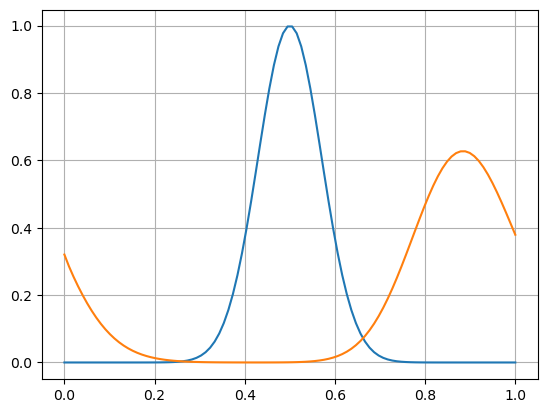

In [11]:
nx = 100; CFL=0.5
x = np.linspace(0,1,nx); dx = x[1]-x[0]; dt = CFL*dx
#u = np.sin(4*np.pi*x)
u = np.exp(-(x-0.5)**2/0.01)
plt.plot(x,u)

unew = 0.*u; tend = 0.2; time = 0

while (time<tend-1.e-10):
    dt = min(dt, tend-time)
    time = time + dt
    for i in range(nx):
        if (i != 0 and i != nx-1):
            unew[i] = u[i] - dt*( Flux(u[i],u[i+1]) - Flux(u[i-1],u[i]) )/dx
        elif (i == 0 ):
            unew[i] = u[i] - dt*(Flux(u[i],u[i+1])-Flux(u[nx-1],u[i]))/dx
        else:
            unew[i] = u[i] - dt*(Flux(u[i],u[0])-Flux(u[i-1],u[i]))/dx
    u = unew
        
plt.plot(x, u)
plt.grid()
plt.show()